In [1]:
import os
import sys
import librosa
import tflearn
import pydub
import speech_data
import segment_data
import tensorflow as tf
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
%matplotlib inline

cur = os.getcwd()
os.chdir('/home/cc/')
import pyAudioAnalysis
os.chdir(cur)

hdf5 not supported (please install/reinstall h5py)


/usr/local/lib/python2.7/dist-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# load constants - training directory, testing directory
training_data = '/home/cc/Audio/training/'
testing_data = '/home/cc/Audio/testing/'
training_seg = '/home/cc/Audio/training-seg/'
testing_seg = '/home/cc/Audio/testing-seg/'

In [3]:
# segment the data for use with SVM later
segment_data.segment(training_data, training_seg, 2)
segment_data.segment(testing_data, testing_seg, 2)

number of files: 14
(2, ' speakers: ', ['arun', 'andrew'])
number of files: 4
(2, ' speakers: ', ['arun', 'andrew'])


In [3]:
# now let us view some of the files analytically
files = os.listdir(training_seg)
arun_seg = []
andrew_seg = []
for f in files:
    if 'arun' in f:
        arun_seg.append(f)
    else:
        andrew_seg.append(f)
print('arun_seg length = ' + str(len(arun_seg)) + ' and andrew_seg length = ' + str(len(andrew_seg)))

arun_seg length = 37 and andrew_seg length = 36


In [4]:
# obtain mfcc data for analyzing
os.chdir(training_seg)
arun_mfcc = []
andrew_mfcc = []
for a, b in zip(arun_seg, andrew_seg):
    y, sr = librosa.load(a)
    y1, sr1 = librosa.load(b)
    arun_mfcc.append(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20))
    andrew_mfcc.append(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=20))

In [5]:
dist = np.linalg.norm(arun_mfcc)
dist1 = np.linalg.norm(andrew_mfcc)

In [6]:
print(dist, dist1)

(20046.384063670655, 18384.539265191532)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(arun_mfcc)
pca1 = PCA(andrew_mfcc)

In [8]:
#calculate 2d indicators
def indic(data):
    #alternatively you can calulate any other indicators
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    #s = np.std(data, axis=1)
    return max, min

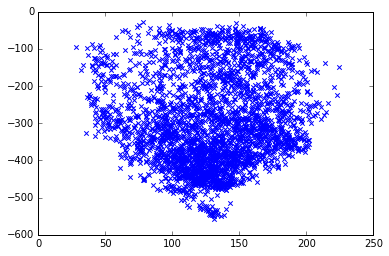

In [9]:
x,y = indic(arun_mfcc)
x1,y1 = indic(andrew_mfcc)
plt.scatter(x,y, marker='x')
plt.show()

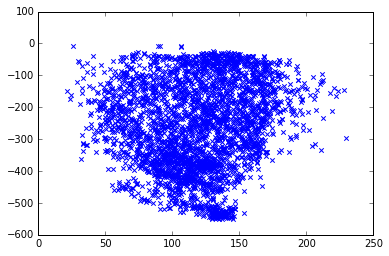

In [10]:
plt.scatter(x1, y1, marker='x')
plt.show()

In [11]:
# obtain mfcc data for analyzing
os.chdir(training_data)
arun = []
andrew = []
for f in os.listdir(os.getcwd()):
    if 'arun' in f:
        arun.append(f)
    else:
        andrew.append(f)
arun_mfcc2 = []
andrew_mfcc2 = []
for a, b in zip(arun, andrew):
    y, sr = librosa.load(a)
    y1, sr1 = librosa.load(b)
    arun_mfcc2.append(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20))
    andrew_mfcc2.append(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=20))

In [12]:
data1 = []
data2 = []
for item, item2 in zip(arun_mfcc2, andrew_mfcc2):
    data1.append(item)
    data2.append(item2)

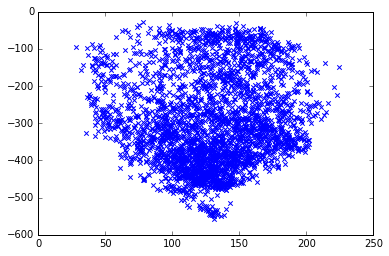

In [13]:
x,y = indic(arun_mfcc)
x1,y1 = indic(andrew_mfcc)
plt.scatter(x,y, marker='x')
plt.show()

In [45]:
from sklearn.decomposition import PCA as skpca

In [15]:
arun_pca = []
andrew_pca = []
for a, b in zip(arun_mfcc, andrew_mfcc):
    arun_pca.append(PCA(a))
    andrew_pca.append(PCA(b))

In [16]:
arun = np.asarray(arun_mfcc)

In [17]:
arun.shape

(36, 20, 87)

In [18]:
a = arun_mfcc[0]
a = np.asarray(a)
print(a.shape)

(20, 87)


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X_std = StandardScaler().fit_transform(a)

In [23]:
pca = PCA(n_components=2)
pca1 = PCA(n_components=1)

In [25]:
pca1.fit_transform(a)

array([[ 3295.19304825],
       [-1433.81105792],
       [ -108.94751289],
       [ -394.23860327],
       [ -206.85175258],
       [ -103.27510663],
       [  -84.61504976],
       [ -169.25675914],
       [  -24.820862  ],
       [  -90.32427322],
       [  -37.75571445],
       [ -163.63414213],
       [  -69.11309038],
       [  -29.74891657],
       [  -37.04102631],
       [ -108.98481406],
       [  -15.91154214],
       [  -93.96410367],
       [  -69.12755126],
       [  -53.77116987]])

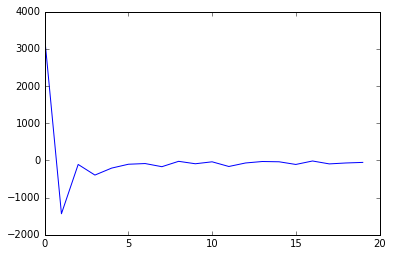

In [26]:
plt.plot(pca1.fit_transform(a))

In [59]:
def PCA(data):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    #import numpy as NP
    from scipy import linalg as LA
    m, n = data.shape
    # mean center the data
    dims_rescaled_data = 2
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data.T).T, evals, evecs

def test_PCA(data):
    '''
    test by attempting to recover original data array from
    the eigenvectors of its covariance matrix & comparing that
    'recovered' array with the original data
    '''
    m, n = data.shape
    _ , _ , eigenvectors = PCA(data)
    data_recovered = np.dot(eigenvectors, m).T
    data_recovered += data_recovered.mean(axis=0)
    assert np.allclose(data, data_recovered)
    
def plot_pca(data):
    from matplotlib import pyplot as MPL
    clr1 =  '#2026B2'
    fig = MPL.figure()
    ax1 = fig.add_subplot(111)
    data_resc, data_orig = PCA(data)
    ax1.plot(data_resc[:, 0], data_resc[:, 1], '.', mfc=clr1, mec=clr1)
    MPL.show()

In [28]:
arun = []
andrew = []
for item1, item2 in zip(arun_mfcc, andrew_mfcc):
    arun.append(pca.fit_transform(item1))
    andrew.append(pca.fit_transform(item2))

In [68]:
arun = np.asarray(arun_mfcc)
arun = arun.reshape((720, 87))
andrew = np.asarray(andrew_mfcc)
andrew = andrew.reshape((720, 87))

In [76]:
A,B,C = PCA(data=arun)
D,E,F = PCA(data=andrew)
G = np.concatenate((A, D), axis=1)
print(A.shape, B.shape, C.shape, D.shape, E.shape, F.shape, G.shape)

((720, 2), (87,), (87, 2), (720, 2), (87,), (87, 2), (720, 4))


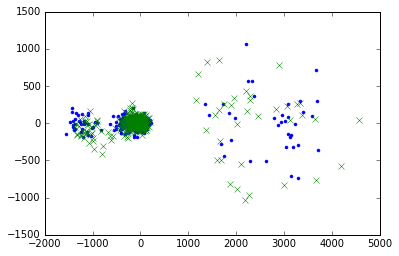

In [78]:
clr1 =  '#2026B2'
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(G[:, 0], G[:, 1], '.', G[:, 2], G[:, 3], 'x')
plt.show()

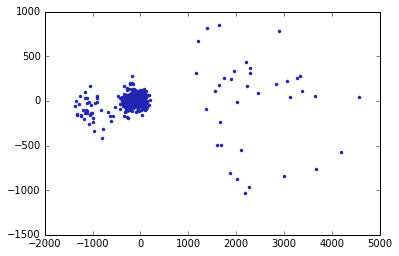

In [70]:
clr1 =  '#2026B2'
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(D[:, 0], D[:, 1], '.', mfc=clr1, mec=clr1)
plt.show()

In [58]:
arun = []
andrew = []
for item1, item2 in zip(arun_mfcc, andrew_mfcc):
    arun.append(pca.fit_transform(item1))
    andrew.append(pca.fit_transform(item2))

In [59]:
arun = np.asarray(arun)
andrew = np.asarray(andrew)
print(arun.shape)

(36, 20, 2)


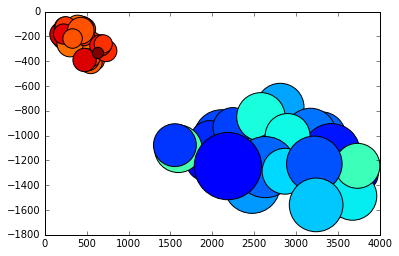

In [76]:
x, y = indic(arun)
x1, y1 = indic(andrew)
x2 = x + x1
y2 = y + y1
plt.scatter(x,y, x1, y1)
#plt.scatter(x1, y1)
plt.show()

In [79]:
b = pca.fit_transform(a)

In [80]:
print(pca.explained_variance_ratio_)

[ 0.97425609  0.01560283]


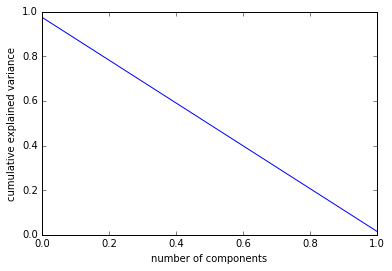

In [81]:
#Explained variance
#pca = PCA().fit(X_std)
plt.plot(pca.explained_variance_ratio_)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

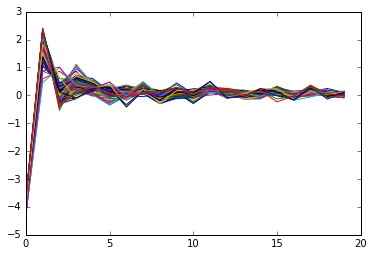

In [55]:
plt.plot(X_std)
plt.show()

In [82]:
new_dir = '/home/cc/Audio/Train/'
new_seg = '/home/cc/Audio/Segment/'
#segment_data.segment(new_dir, new_seg, 2)

In [83]:
# now let us view some of the files analytically
files = os.listdir(new_dir)
arun_seg = []
andrew_seg = []
for f in files:
    if 'arun' in f:
        arun_seg.append(f)
    else:
        andrew_seg.append(f)
print('arun_seg length = ' + str(len(arun_seg)) + ' and andrew_seg length = ' + str(len(andrew_seg)))

# obtain mfcc data for analyzing
os.chdir(new_dir)
arun_mfcc = []
andrew_mfcc = []
for a, b in zip(arun_seg, andrew_seg):
    y, sr = librosa.load(a)
    y1, sr1 = librosa.load(b)
    arun_mfcc.append(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20))
    andrew_mfcc.append(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=20))

arun_seg length = 4 and andrew_seg length = 4


In [89]:
arun1 = np.asarray(arun_mfcc)

ValueError: could not broadcast input array from shape (20,959) into shape (20)

In [84]:
arun = np.asarray(arun_mfcc)
#arun = arun.reshape((720, 87))
andrew = np.asarray(andrew_mfcc)
#andrew = andrew.reshape((720, 87))

ValueError: could not broadcast input array from shape (20,959) into shape (20)

In [88]:
arun = []
andrew = []
for item1, item2 in zip(arun_mfcc, andrew_mfcc):
    arun.append(pca.fit_transform(item1))
    andrew.append(pca.fit_transform(item2))

In [89]:
arun = np.asarray(arun)
andrew = np.asarray(andrew)
print(arun.shape)

(4, 20, 2)


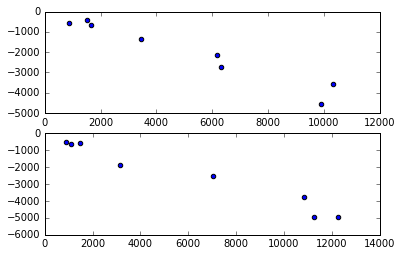

In [90]:
x, y = indic(arun)
x1, y1 = indic(andrew)
x2 = x + x1
y2 = y + y1
#plt.scatter(x,y, x1, y1)
plt.subplot(2,1,1)
plt.scatter(x1, y1)
plt.subplot(2,1,2)
plt.scatter(x,y)
plt.show()

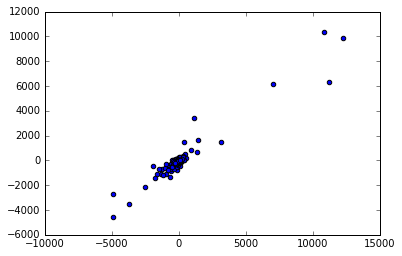

In [92]:
plt.scatter(arun, andrew)